# Weather Data Analysis Project - Programming for Data Analytics

# Imports

In [1]:
# Dataframes
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical computations
import numpy as np

# Statistical and machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Notebook Layout
For **(i) Shannon Airport** and **(ii) Dublin Airport**:
1. Retrieve the Dataset

2. Clean the Dataset

3. Analyse the Dataset:
 - **(a)** Mean Wind Speed
 - **(b)** Max Wind Speed
 - **(c)** Wind Speed by Month
 - **(d)** Correlation matrix between features
 - **(e)** Making Predictions (Linear Regression)

 4. Conclusion

## **1.** Retrieve the Dataset

## **1.** Retrieve the Dataset

### **(i)** Shannon Airport

I sourced my dataset from [Met Éireann](https://www.met.ie/climate/available-data/historical-data)

I saved the dataset as `shannon.csv` - this CSV file gives the hourly weather data in Shannon Airport from 1945 to 2025.

In [2]:
# Filename & Data Directory
filename = "shannon_data.csv"

# Read in CSV file
df_s = pd.read_csv(filename, skiprows=23)

df_s.head()

C:\Users\ZMH\AppData\Local\Temp\ipykernel_32820\1365716384.py:5: DtypeWarning: Columns (6,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv(filename, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-sep-1945 01:00,0,0.1,0,15.3,0,14.6,14.4,16.0,92,...,1,17,1,90,50,6,0.0,7000,16,8
1,01-sep-1945 02:00,2,0.0,0,15.0,0,14.6,14.4,16.4,95,...,1,17,1,90,51,5,0.0,7000,9,8
2,01-sep-1945 03:00,0,0.1,0,15.0,0,14.6,14.4,16.4,95,...,1,17,1,100,51,6,0.0,7000,9,8
3,01-sep-1945 04:00,2,0.0,0,15.0,0,14.4,13.8,16.0,94,...,1,14,1,90,20,5,0.0,7000,9,8
4,01-sep-1945 05:00,0,0.0,0,15.0,0,14.5,14.4,16.1,95,...,1,16,1,110,2,2,0.0,10000,17,7


### **(ii)** Dublin Airport

In [3]:
# Filename & Data Directory
filename = "dublin_data.csv"

# Read in CSV file
df_d = pd.read_csv(filename, skiprows=23)

df_d.head()

C:\Users\ZMH\AppData\Local\Temp\ipykernel_32820\1252321557.py:5: DtypeWarning: Columns (8,9,14,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_d = pd.read_csv(filename, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-jan-1945 00:00,2,0.0,0,4.9,0,4.6,4.4,8.2,95,...,1,0,1,0,50,4,0.0,200,2,8
1,01-jan-1945 01:00,3,0.0,0,5.1,0,4.9,4.4,8.5,97,...,1,0,1,0,45,4,0.0,200,2,8
2,01-jan-1945 02:00,2,0.0,0,5.1,0,4.8,4.4,8.5,97,...,1,0,1,0,50,4,0.0,4800,4,8
3,01-jan-1945 03:00,0,0.2,0,5.2,0,5.0,4.4,8.5,97,...,1,0,1,0,50,4,0.0,6000,4,8
4,01-jan-1945 04:00,2,0.0,0,5.6,0,5.4,5.0,8.8,97,...,1,7,1,250,50,5,0.0,6000,4,8


## **2.** Clean the Dataset

### **(i)** Shannon Airport

I found some empty strings in the wdsp column when trying to plot. I used the [`strip()`](https://docs.python.org/3.6/library/stdtypes.html) and the [`df.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) method to clean this column. 

In [4]:
# Remove empty strings and convert to numeric
df_s['wdsp'] = pd.to_numeric(df_s['wdsp'].astype(str).str.strip(), errors='coerce')
df_s['rhum'] = pd.to_numeric(df_s['rhum'].astype(str).str.strip(), errors='coerce')
df_s['temp'] = pd.to_numeric(df_s['temp'].astype(str).str.strip(), errors='coerce')
df_s['vis'] = pd.to_numeric(df_s['vis'].astype(str).str.strip(), errors='coerce')
df_s['sun'] = pd.to_numeric(df_s['sun'].astype(str).str.strip(), errors='coerce')
df_s['clht'] = pd.to_numeric(df_s['clht'].astype(str).str.strip(), errors='coerce')
df_s['clamt'] = pd.to_numeric(df_s['clamt'].astype(str).str.strip(), errors='coerce')
df_s['dewpt'] = pd.to_numeric(df_s['dewpt'].astype(str).str.strip(), errors='coerce')
df_s['vappr'] = pd.to_numeric(df_s['vappr'].astype(str).str.strip(), errors='coerce')
df_s['wddir'] = pd.to_numeric(df_s['wddir'].astype(str).str.strip(), errors='coerce')

# Create sine and cosine components for wind direction
df_s['wddir_sin'] = np.sin(np.deg2rad(df_s['wddir']))
df_s['wddir_cos'] = np.cos(np.deg2rad(df_s['wddir']))

# Drop rows where any values couldn't be converted
df_s = df_s.dropna(subset=['wdsp', 'rhum', 'temp', 'vis', 'sun', 'clht', 'clamt', 'wddir', 'dewpt', 'vappr', 'wddir_sin', 'wddir_cos'])
df_s.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,wddir_sin,wddir_cos
0,01-sep-1945 01:00,0,0.1,0,15.3,0,14.6,14.4,16.0,92,...,1,90.0,50,6,0.0,7000.0,16.0,8.0,1.000000,6.123234e-17
1,01-sep-1945 02:00,2,0.0,0,15.0,0,14.6,14.4,16.4,95,...,1,90.0,51,5,0.0,7000.0,9.0,8.0,1.000000,6.123234e-17
2,01-sep-1945 03:00,0,0.1,0,15.0,0,14.6,14.4,16.4,95,...,1,100.0,51,6,0.0,7000.0,9.0,8.0,0.984808,-1.736482e-01
3,01-sep-1945 04:00,2,0.0,0,15.0,0,14.4,13.8,16.0,94,...,1,90.0,20,5,0.0,7000.0,9.0,8.0,1.000000,6.123234e-17
4,01-sep-1945 05:00,0,0.0,0,15.0,0,14.5,14.4,16.1,95,...,1,110.0,2,2,0.0,10000.0,17.0,7.0,0.939693,-3.420201e-01


I also made the index a datetime object for easier manipulation.

In [5]:
# Make index datetime
df_s['date'] = pd.to_datetime(df_s['date'], format="%d-%b-%Y %H:%M")
df_s = df_s.set_index('date')

### **(i)** Dublin Airport

I found no missing values in the Dublin Airport dataset:

In [6]:
# Check for missing values
df_d.isna().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [ ]:
# Remove empty strings and convert to numeric
df_d['wdsp'] = pd.to_numeric(df_d['wdsp'].astype(str).str.strip(), errors='coerce')
df_d['rhum'] = pd.to_numeric(df_d['rhum'].astype(str).str.strip(), errors='coerce')
df_d['temp'] = pd.to_numeric(df_d['temp'].astype(str).str.strip(), errors='coerce')
df_d['vis'] = pd.to_numeric(df_d['vis'].astype(str).str.strip(), errors='coerce')
df_d['sun'] = pd.to_numeric(df_d['sun'].astype(str).str.strip(), errors='coerce')
df_d['clht'] = pd.to_numeric(df_d['clht'].astype(str).str.strip(), errors='coerce')
df_d['clamt'] = pd.to_numeric(df_d['clamt'].astype(str).str.strip(), errors='coerce')
df_d['dewpt'] = pd.to_numeric(df_d['dewpt'].astype(str).str.strip(), errors='coerce')
df_d['vappr'] = pd.to_numeric(df_d['vappr'].astype(str).str.strip(), errors='coerce')
df_d['wddir'] = pd.to_numeric(df_d['wddir'].astype(str).str.strip(), errors='coerce')

# Create sine and cosine components for wind direction
df_d['wddir_sin'] = np.sin(np.deg2rad(df_d['wddir']))
df_d['wddir_cos'] = np.cos(np.deg2rad(df_d['wddir']))

# Drop rows where any values couldn't be converted
df_d = df_d.dropna(subset=['wdsp', 'rhum', 'temp', 'vis', 'sun', 'clht', 'clamt', 'wddir', 'dewpt', 'vappr', 'wddir_sin', 'wddir_cos'])
df_d.head()

I set the index as a datetime object using [`df.set_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)

In [ ]:
# Make index datetime
df_d['date'] = pd.to_datetime(df_d['date'], format="%d-%b-%Y %H:%M")
df_d = df_d.set_index('date')

The Dublin Airport dataset goes all the way back to 1939, but the Shannon Airport dataset starts on September 1st, 1945. 

I decided to trim the Dublin Airport dataset to start at the same time to ensure uniformity in the analysis.

In [ ]:
# Only include data from September 1, 1945 onwards
df_d = df_d.sort_index()
df_d = df_d[df_d.index >= '1945-09-01 01:00']

## **3.** Analyse the Dataset

### **(a).** Mean Wind Speed

#### **(i)** Shannon Airport

I want to analyse windspeed first and foremost.

The column `wdsp` shows the hourly mean wind speed in knots. I will plot this information, resampling to find the daily, monthly and yearly averages.

In [ ]:
# Create hourly wind speed series
hourly_wdsp_s = df_s['wdsp']

#### **(ii)** Dublin Airport

In [ ]:
# Create hourly wind speed series
hourly_wdsp_d = df_d['wdsp']

#### • Hourly **Mean** Wind Speed 

I first plotted the hourly mean wind speed as this doesn't require much manipulation of the dataset.

I looked at the documentation for [`pd.date_range`](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html) as I wasn't happy with the original spacing of the years.

I also asked [ChatGPT](https://chatgpt.com/share/693177e4-c100-800c-a547-01ab88af2e68) for help with the formatting of the datetime x ticks.

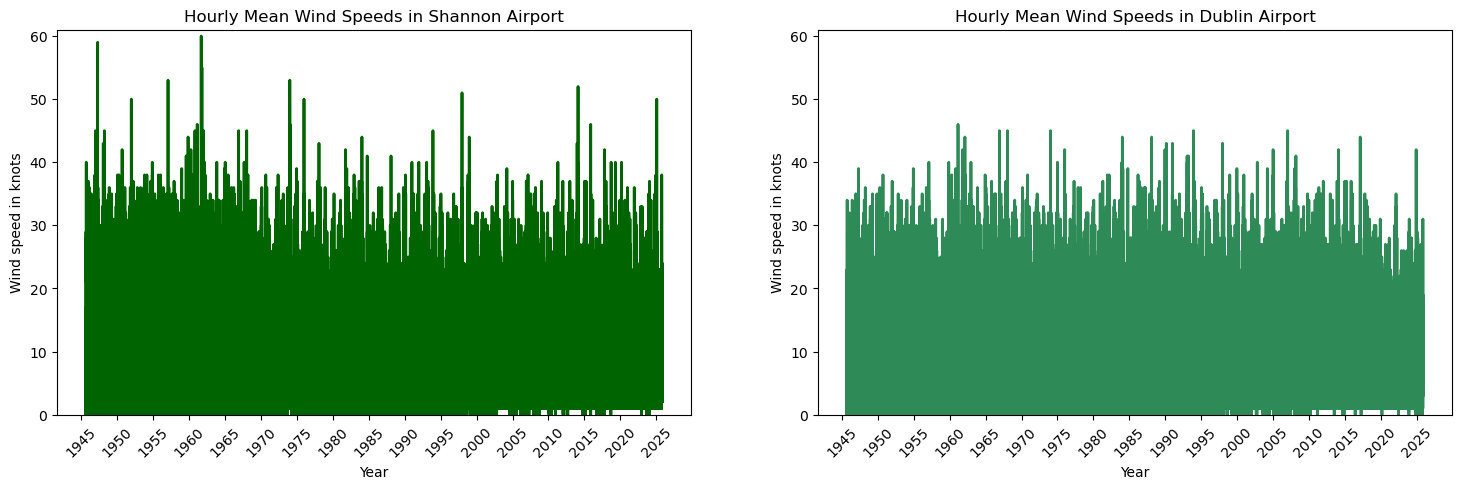

In [ ]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

ax1.plot(hourly_wdsp_s, color='darkgreen', linewidth=2)
ax2.plot(hourly_wdsp_d, color='seagreen', linewidth=2)

# Axes labels
ax1.set_xlabel('Year')
ax2.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ax2.set_ylabel('Wind speed in knots')

# Set xticks to be just the years, every 5 years
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks, ticks.strftime('%Y'), rotation=45)
ax2.set_xticks(ticks, ticks.strftime('%Y'), rotation=45)

# Set yticks to be the same on both plots (0 to 60 knots)
ax1.set_ylim(0, 61)
ax2.set_ylim(0, 61)
ax1.set_title('Hourly Mean Wind Speeds in Shannon Airport')
ax2.set_title('Hourly Mean Wind Speeds in Dublin Airport')
plt.savefig('Plots/hourly_wdsp_airports.png')
plt.show()

#### • Daily, Monthly and Yearly **Mean** Wind Speed

To find the daily/monthly/yearly mean wdsp, instead of the given hourly mean wdsp, I used the [`df.resample().mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method.

In [ ]:
# Shannon Airport - Daily Monthly and Yearly Mean Wind Speeds
daily_wdsp_s = df_s['wdsp'].resample("D").mean()
monthly_wdsp_s = df_s['wdsp'].resample("MS").mean()
yearly_wdsp_s = df_s['wdsp'].resample("YS").mean()

In [ ]:
# Dublin Airport - Daily Monthly and Yearly Mean Wind Speeds
daily_wdsp_d = df_d['wdsp'].resample("D").mean()
monthly_wdsp_d = df_d['wdsp'].resample("MS").mean()
yearly_wdsp_d = df_d['wdsp'].resample("YS").mean()

I wanted to plot these three series on one figure for easier analysis.

#### **(i)** Shannon Airport

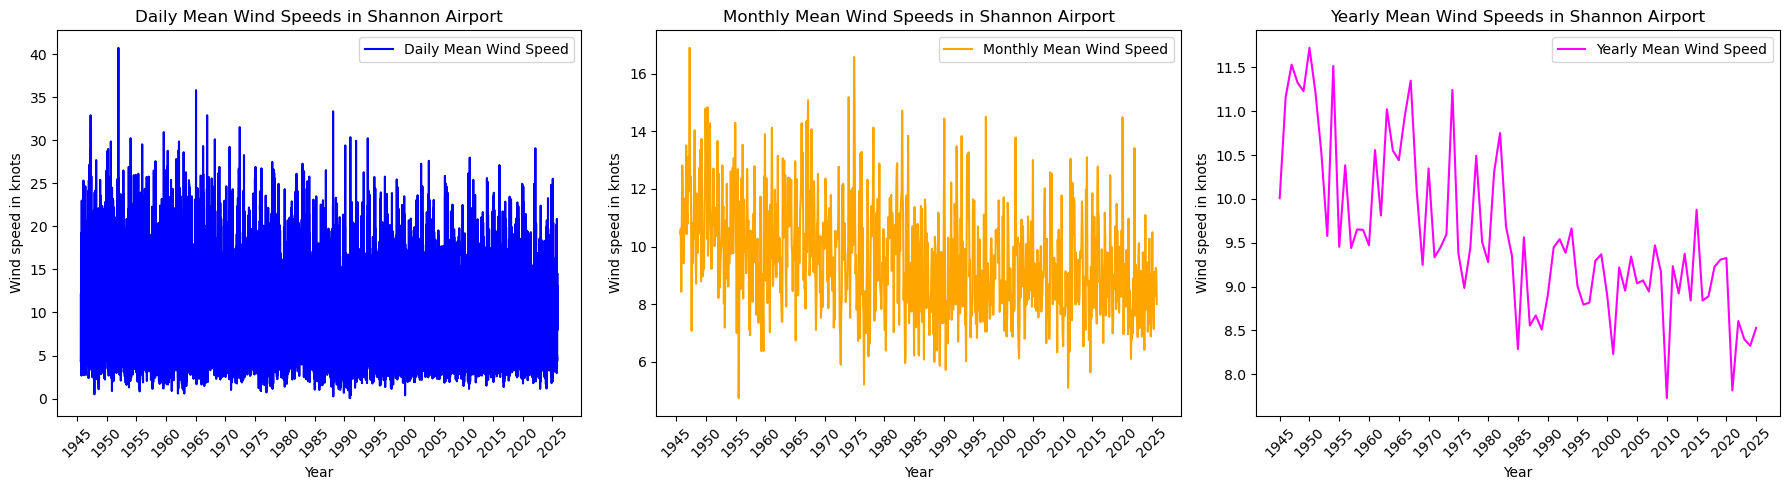

In [ ]:
# Multiple plots on one figure to show mean wind speeds at different time scales
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Plot daily mean wind speed
ax1.plot(daily_wdsp_s, label='Daily Mean Wind Speed', color='blue')
ax1.set_title('Daily Mean Wind Speeds in Shannon Airport')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax1.legend()

# Plot monthly mean wind speed
ax2.plot(monthly_wdsp_s, label='Monthly Mean Wind Speed', color='orange')
ax2.set_title('Monthly Mean Wind Speeds in Shannon Airport')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax2.legend()

# Plot yearly mean wind speed
ax3.plot(yearly_wdsp_s, label='Yearly Mean Wind Speed', color='magenta')
ax3.set_title('Yearly Mean Wind Speeds in Shannon Airport')
ax3.set_xlabel('Year')
ax3.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax3.legend()
plt.tight_layout()
plt.savefig('Plots/mean_wdsp_shannon_daily_monthly_yearly.png')
plt.show()

The above plots show that, generally, mean wind speeds in Shannon Airport are lower now than they were 80 years ago. The yearly mean wind speeds plot is the clearest depiction of this, while the daily mean wdsp plot has a large amount of data points and isn't as easy to interpret. The monthly plot also shows a general downwards trend but we can see some outliers (some month in 1956 shows a very low mean wdsp).

#### **(ii)** Dublin Airport

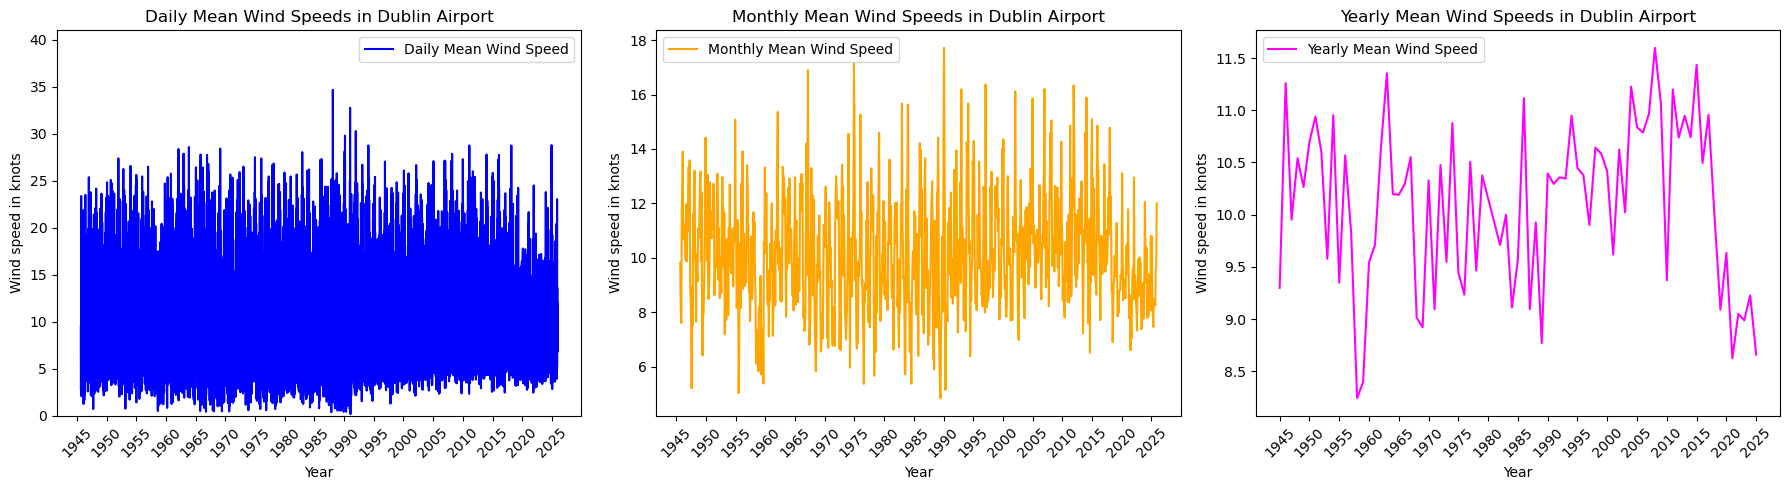

In [ ]:
# Multiple plots on one figure to show mean wind speeds at different time scales
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Plot daily mean wind speed
ax1.plot(daily_wdsp_d, label='Daily Mean Wind Speed', color='blue')
ax1.set_title('Daily Mean Wind Speeds in Dublin Airport')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks)
ax1.set_ylim(0, 41)
ax1.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax1.legend()

# Plot monthly mean wind speed
ax2.plot(monthly_wdsp_d, label='Monthly Mean Wind Speed', color='orange')
ax2.set_title('Monthly Mean Wind Speeds in Dublin Airport')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax2.legend()

# Plot yearly mean wind speed
ax3.plot(yearly_wdsp_d, label='Yearly Mean Wind Speed', color='magenta')
ax3.set_title('Yearly Mean Wind Speeds in Dublin Airport')
ax3.set_xlabel('Year')
ax3.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax3.legend()
plt.tight_layout()
plt.savefig('Plots/mean_wdsp_dublin_daily_monthly_yearly.png')
plt.show()

### **(b)** Max Wind Speed

#### • Daily, Monthly and Yearly **Max** Wind Speed

To find the maximum windspeed over different timescales, I used the [`df.resample().max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method.

##### **(i)** Shannon Airport

In [ ]:
daily_max_wdsp_s = df_s['wdsp'].resample("D").max()
monthly_max_wdsp_s = df_s['wdsp'].resample("MS").max()
yearly_max_wdsp_s = df_s['wdsp'].resample("YS").max()

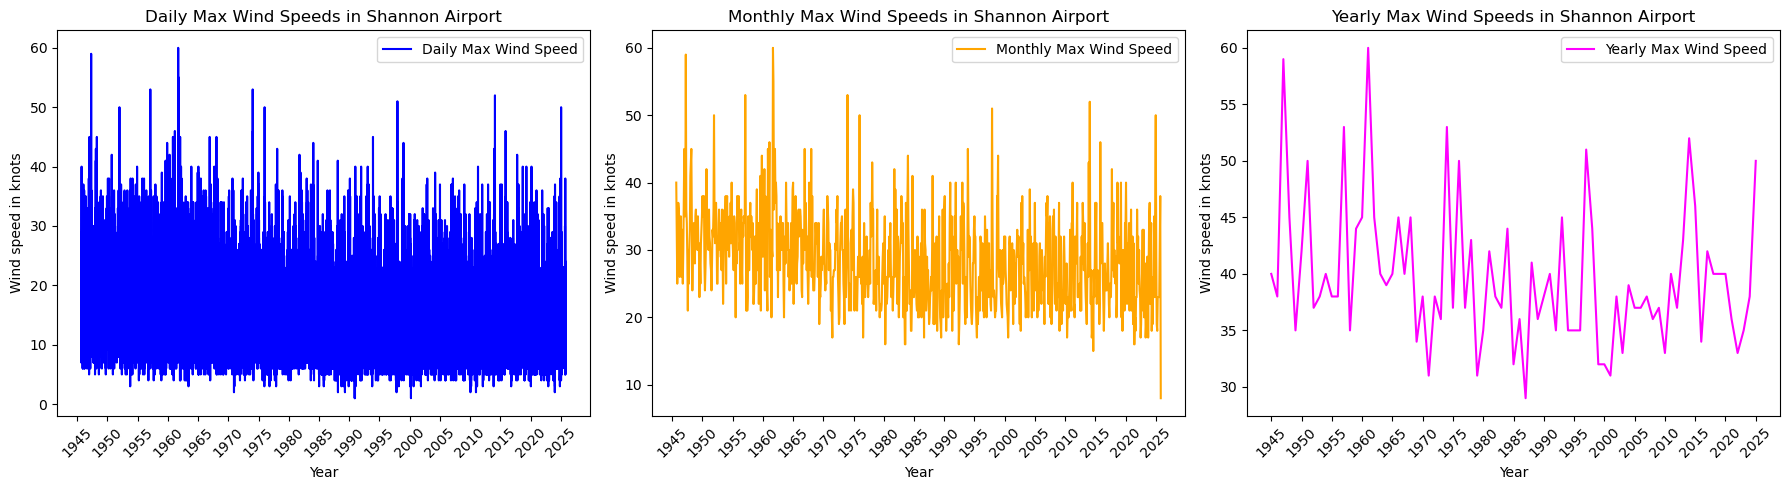

In [ ]:
# Plot of daily, monthly and yearly maximum wind speeds
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Plot daily max wind speed
ax1.plot(daily_max_wdsp_s, label='Daily Max Wind Speed', color='blue')
ax1.set_title('Daily Max Wind Speeds in Shannon Airport')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax1.legend()

# Plot monthly max wind speed
ax2.plot(monthly_max_wdsp_s, label='Monthly Max Wind Speed', color='orange')
ax2.set_title('Monthly Max Wind Speeds in Shannon Airport')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax2.legend()

# Plot yearly max wind speed
ax3.plot(yearly_max_wdsp_s, label='Yearly Max Wind Speed', color='magenta')
ax3.set_title('Yearly Max Wind Speeds in Shannon Airport')
ax3.set_xlabel('Year')
ax3.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax3.legend()

plt.tight_layout()
plt.savefig('Plots/max_wdsp_shannon_daily_monthly_yearly.png')
plt.show()

Although the above plots suggest that the max wind speeds have reduced in the past 80 years, it could be argued that there are more buildings around Shannon Airport which block the wind and slow it down.

**Shannon Airport in 1959:**
<p>
  <img src="Images/shannon_airport_1959.png" width="400">
</p>

**A more recent photo of Shannon Airport:**
<p>
  <img src="Images/shannon_airport_2018.jpg" width="400">
</p>




##### **(ii)** Dublin Airport

In [ ]:
# Create daily, monthly, and yearly maximum wind speed series for Dublin Airport
daily_max_wdsp_d = df_d['wdsp'].resample("D").max()
monthly_max_wdsp_d = df_d['wdsp'].resample("MS").max()
yearly_max_wdsp_d = df_d['wdsp'].resample("YS").max()

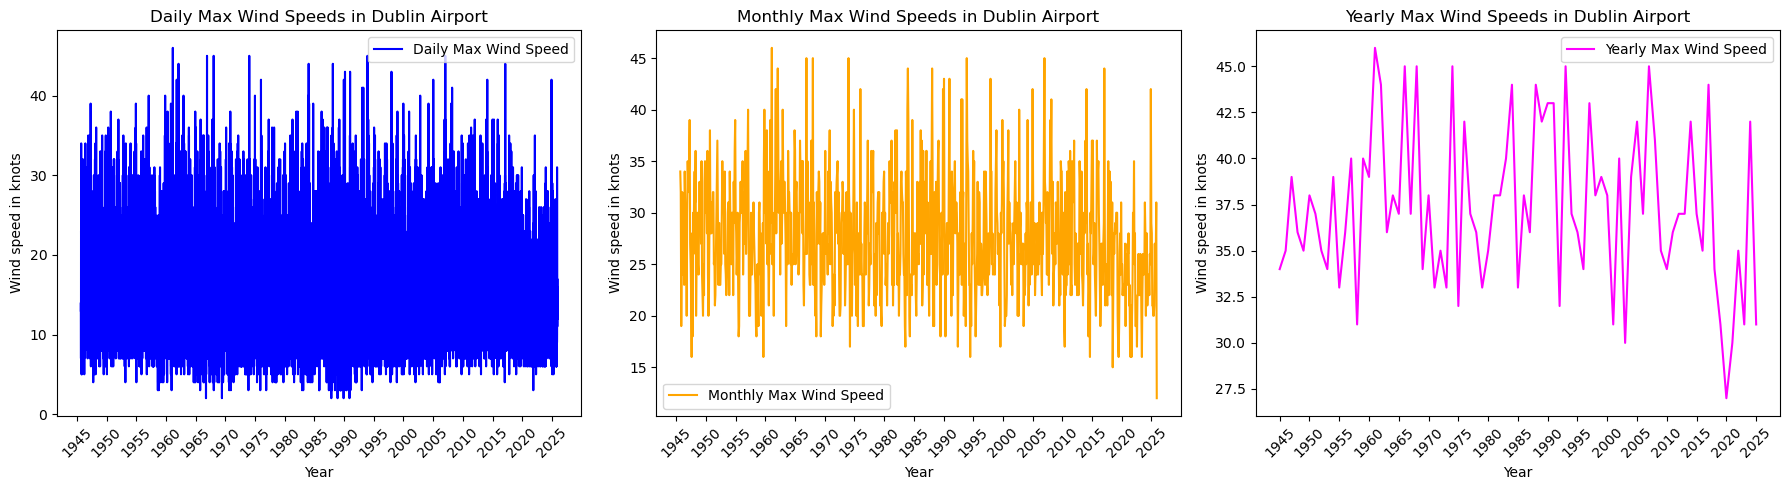

In [ ]:
# Plot of daily, monthly and yearly maximum wind speeds
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Plot daily max wind speed
ax1.plot(daily_max_wdsp_d, label='Daily Max Wind Speed', color='blue')
ax1.set_title('Daily Max Wind Speeds in Dublin Airport')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax1.legend()

# Plot monthly max wind speed
ax2.plot(monthly_max_wdsp_d, label='Monthly Max Wind Speed', color='orange')
ax2.set_title('Monthly Max Wind Speeds in Dublin Airport')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax2.legend()

# Plot yearly max wind speed
ax3.plot(yearly_max_wdsp_d, label='Yearly Max Wind Speed', color='magenta')
ax3.set_title('Yearly Max Wind Speeds in Dublin Airport')
ax3.set_xlabel('Year')
ax3.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax3.legend()

plt.tight_layout()
plt.savefig('Plots/max_wdsp_dublin_daily_monthly_yearly.png')
plt.show()

The max wind speeds in Dublin Airport appear more consistent since 1945 than that of Shannon. There might be a slight general decline in the past couple of decades but it is not as obvious. 

### **(c)** Wind Speed by Month

I am interested in seeing if there is any significant difference between the mean wind speeds each month.

I asked ChatGPT how to group the months together and learned about the [`groupby()`](https://chatgpt.com/share/693177e4-c100-800c-a547-01ab88af2e68) method. 

#### **(i)** Shannon Airport

I prepared the data for plotting by grouping the months together by windspeed.

In [ ]:
# Divide wdsp column into categories based on months
df_s['month'] = df_s['month'] = pd.Categorical(
    df_s.index.month_name(),
    categories=[
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ],
    ordered=True
)

# Wasn't sure how to group the months so asked ChatGPT to find the groupby() method
monthly_means_s = df_s.groupby('month')['wdsp'].mean()


C:\Users\ZMH\AppData\Local\Temp\ipykernel_19308\1064331937.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_means_s = df_s.groupby('month')['wdsp'].mean()


#### **(ii)** Dublin Airport

In [ ]:
# Divide wdsp column into categories based on months
df_d['month'] = df_d['month'] = pd.Categorical(
    df_d.index.month_name(),
    categories=[
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ],
    ordered=True
)

# Grouping the months by mean wdsp
monthly_means_d = df_d.groupby('month')['wdsp'].mean()

C:\Users\ZMH\AppData\Local\Temp\ipykernel_19308\760708323.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_means_d = df_d.groupby('month')['wdsp'].mean()


Then I plotted both airports' monthly mean wind speeds together.

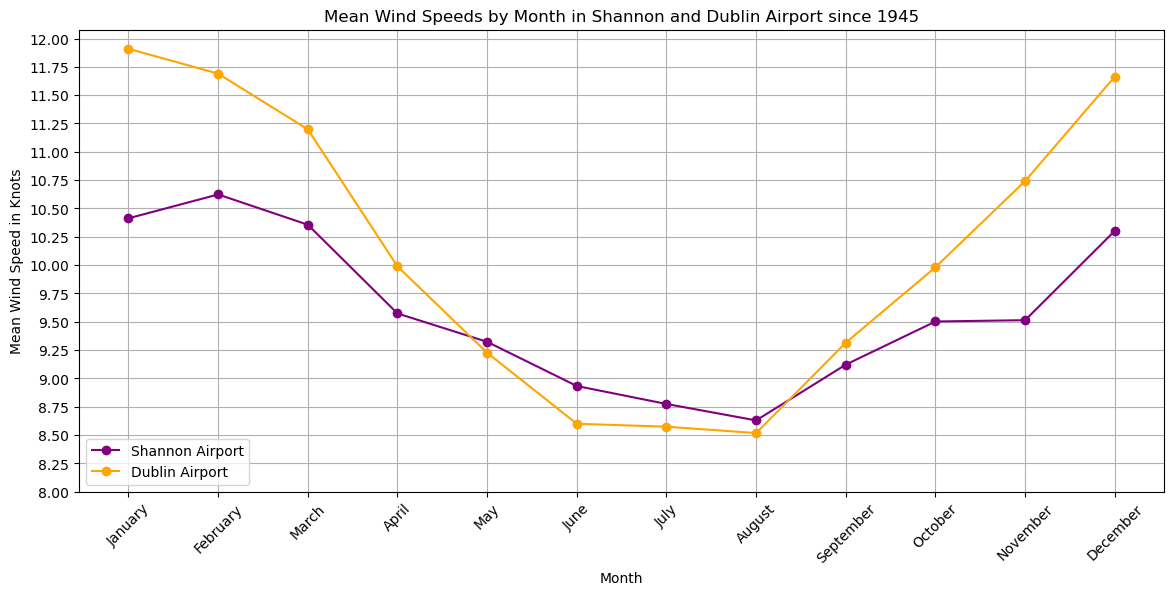

In [ ]:
plt.subplots(figsize=(14, 6))

plt.plot(monthly_means_s.index, monthly_means_s.values, marker='o', label='Shannon Airport', color='purple')
plt.plot(monthly_means_d.index, monthly_means_d.values, marker='o', label='Dublin Airport', color='orange')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed in Knots')
plt.title('Mean Wind Speeds by Month in Shannon and Dublin Airport since 1945')
plt.xticks(rotation=45)
plt.yticks(np.arange(8, 12.25, 0.25))
plt.legend()
plt.grid()
plt.savefig('Plots/mean_wdsp_by_month_airports.png')
plt.show()

The above plot shows us that there is a clear decrease in wind speed as it goes from winter into summer. August shows the lowest average wind speed in both airports every year since 1945. The mean wind speed then increases from September, reaching it's highest average speed in January (Dublin Airport) and February (Shannon Airport).

Dublin Airport shows higher mean windspeeds per month on average when compared with Shannon Airport.

### **(d)** Correlation Matrix

First I want to check what the correlation is between the windspeed in Shannon and Dublin. The [`.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method gives me the correlation coefficient between the two series.

In [ ]:
corr = hourly_wdsp_s.corr(hourly_wdsp_d)
print(f"Correlation coefficient between Shannon and Dublin Airport wind speeds: {corr:.4f}")

Correlation coefficient between Shannon and Dublin Airport wind speeds: 0.6454


0.65 shows that there is some correlation between the two airports' windspeeds.

Now I want to create a correlation matrix for each airport dataset between certain features (windspeed, temperature, sunshine, visibility, cloud amount, cloud height and relative humidity).

I used [GeeksForGeeks](https://www.geeksforgeeks.org/data-science/create-a-correlation-matrix-using-python/) to help me create each correlation matrix.

In [ ]:
# Create features list
features = ['temp', 'wdsp', 'vis', 'sun', 'clamt', 'rhum', 'dewpt', 'vappr'] 

# Create subsets of Shannon & Dublin dataframes
df_s_subset = df_s[features]
df_d_subset = df_d[features]


In [ ]:
# Compute correlation matrix
corr_s = df_s_subset.corr()
corr_d = df_d_subset.corr()

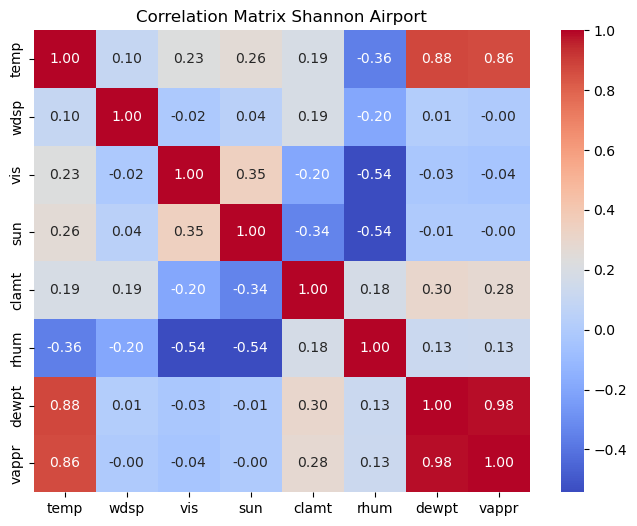

In [ ]:
# Create correlation matrix for Shannon Airport
plt.figure(figsize=(8, 6))
sns.heatmap(corr_s, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Shannon Airport')
plt.show()

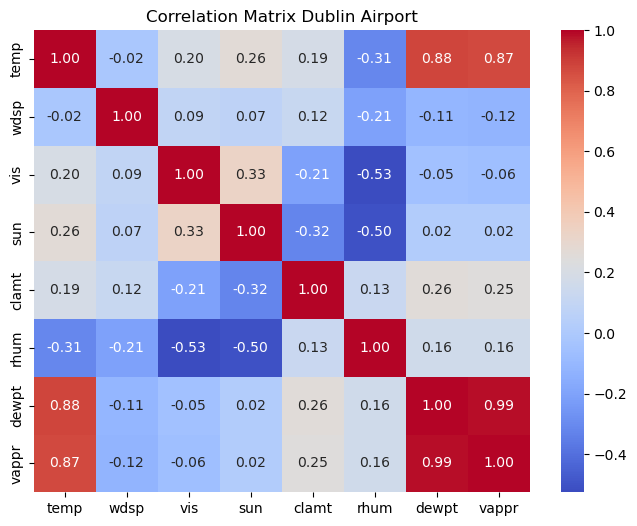

In [ ]:
# Create correlation matrix for Dublin Airport
plt.figure(figsize=(8, 6))
sns.heatmap(corr_d, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Dublin Airport')
plt.show()

The above correlation matrices show many weak correlations between features with some significant findings. The strongest correlation for both airports was between dew point temp and vapour pressure: 0.98 for Shannon and 0.99 for Dublin - this is a very strong positive correlation. Similarly, temperature has a high positive correlation with vapour pressure and dew point temperature. The consistency of these relationships across both airports tells us that this is a robust meteorological pattern.

What is surprising is the lack of correlation between cloud amount and visibility. Also, the temperature and sunshine amount are only weakly correlated.

### **(e)** Making Predictions

I want to see if I can predict the humidity from other features in the dataset. I chose humidity as it seemed to have a relatively strong relationship with a lot of other features. Also, humidity has a large effect on fuel consumption for airlines and is taken into consideration for flight planning. Higher humidity = higher costs [See: https://simpleflying.com/humidity-impact-on-aircraft-performance-guide/]

I used Linear Regression for my predictive model as it is simple and interpretable. I used [GeeksForGeeks](https://www.geeksforgeeks.org/machine-learning/ml-rainfall-prediction-using-linear-regression/) to help me build this model.

#### **(i)** Shannon Airport

I had to do a lot of playing around with different features to get a low error rate and high R2 score. I found the following features to be the best in creating accurate predictions with regards to relative humidity: visibility, temperature, windspeed, sunshine, dew point temp, vapour pressure, wind direction.

In [ ]:
# Shannon Airport Linear Regression Model
X_s = df_s[['vis', 'temp', 'wdsp', 'sun', 'dewpt', 'vappr', 'wddir_sin', 'wddir_cos']]
y_s = df_s['rhum']

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_s_train, y_s_train)
y_s_pred = model.predict(X_s_test)

mse_s = mean_squared_error(y_s_test, y_s_pred)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_s_test, y_s_pred)

print(f"Mean Squared Error: {mse_s}")
print(f"Root Mean Squared Error: {rmse_s}")
print(f"R-squared: {r2_s}")

Mean Squared Error: 4.424421453577328
Root Mean Squared Error: 2.1034308768241776
R-squared: 0.9671233901293056


- Mean Squared Error = 4.42. This tells us the average squared difference between predicted humidity and actual humidity.

- Root Mean Squared Error = 2.1, showing that predictions are typically within +-2% of the actual value.

- R2 score = 0.97. This shows that my chosen features explain about 97% of the variation in relative humidity.

[See conversation with Copilot](https://copilot.microsoft.com/shares/aoeWxvmpkp5qZwdNu71Ve)

Then I plotted the actual vs predicted humidity in Shannon Airport. I also created a plot to show the residuals (errors). The residual plot displays how well the model's predictions match the actual humidity. [See: https://dovetail.com/research/what-is-a-residual-plot/]

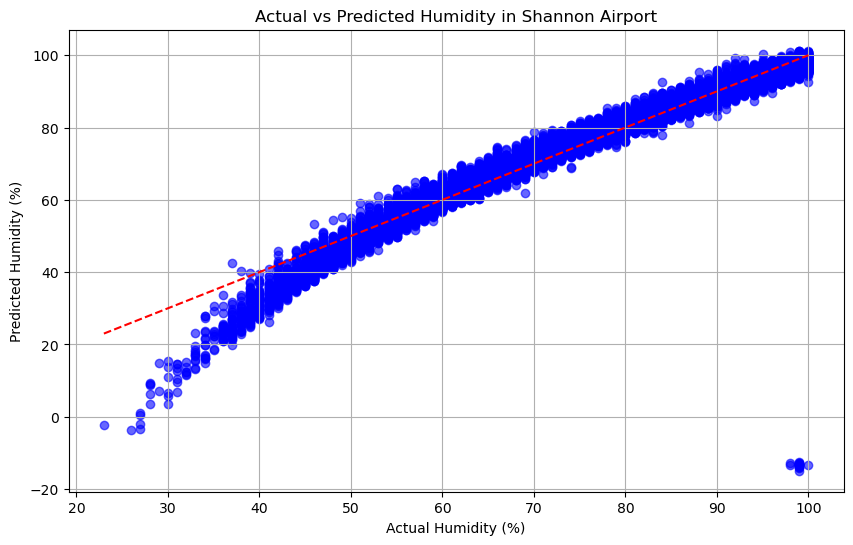

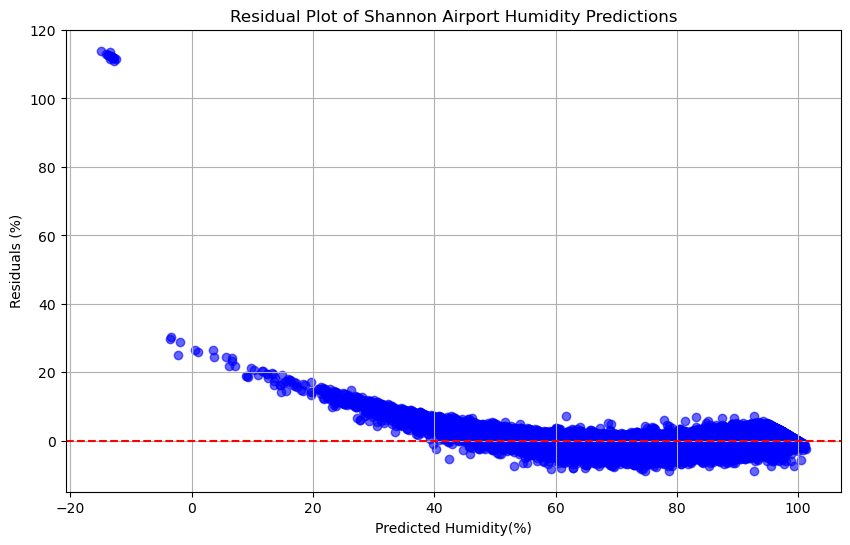

In [ ]:
# Plot Shannon Airport Actual vs Predicted Humidity and Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_s_test, y_s_pred, alpha=0.6, color='blue')
plt.plot([y_s_test.min(), y_s_test.max()], [y_s_test.min(), y_s_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Humidity in Shannon Airport')
plt.xlabel('Actual Humidity (%)')
plt.ylabel('Predicted Humidity (%)')
plt.grid()
plt.savefig('Plots/actual_vs_predicted_humidity_shannon.png')
plt.show()

residuals = y_s_test - y_s_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_s_pred, residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot of Shannon Airport Humidity Predictions')
plt.xlabel('Predicted Humidity(%)')
plt.ylabel('Residuals (%)')
plt.grid()
plt.savefig('Plots/residuals_humidity_shannon.png')
plt.show()

The above plots give by far the best results out of all of my attempts with various features. The alignment with the 1:1 line shows that the model captures both dry and humid conditions quite well. 

A small cluster of outliers can be seen in both the actual vs predicted and residual plots, where the model significantly overestimated humidity. These points might correspond to rare atmospheric conditions that the linear model could not capture effectively. This suggests that while the model performs well overall, its reliability decreases in certain edge cases, which could be addressed with more flexible modelling techniques or further investiation of the dataset. [See Conversation with Copilot.](https://copilot.microsoft.com/shares/aCFGUN6c6i4bG3kFXBAt)

#### **(ii)** Dublin Airport

In [ ]:
# Dublin Airport Linear Regression Model
X_d = df_d[['vis', 'temp', 'wdsp', 'sun', 'dewpt', 'vappr', 'wddir_sin', 'wddir_cos']]
y_d = df_d['rhum']

X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_d_train, y_d_train)
y_d_pred = model.predict(X_d_test)
mse_d = mean_squared_error(y_d_test, y_d_pred)
rmse_d = np.sqrt(mse_d)
r2_d = r2_score(y_d_test, y_d_pred)

print(f"Mean Squared Error: {mse_d}")
print(f"Root Mean Squared Error: {rmse_d}")
print(f"R-squared: {r2_d}")

Mean Squared Error: 3.0435324008707814
Root Mean Squared Error: 1.7445722687440557
R-squared: 0.9777862694877514


I used the same code for the Dublin Airport model building, and it has given me even better results than Shannon:

- MSE = 3.04

- RMSE = 1.74

- R2 = 0.98

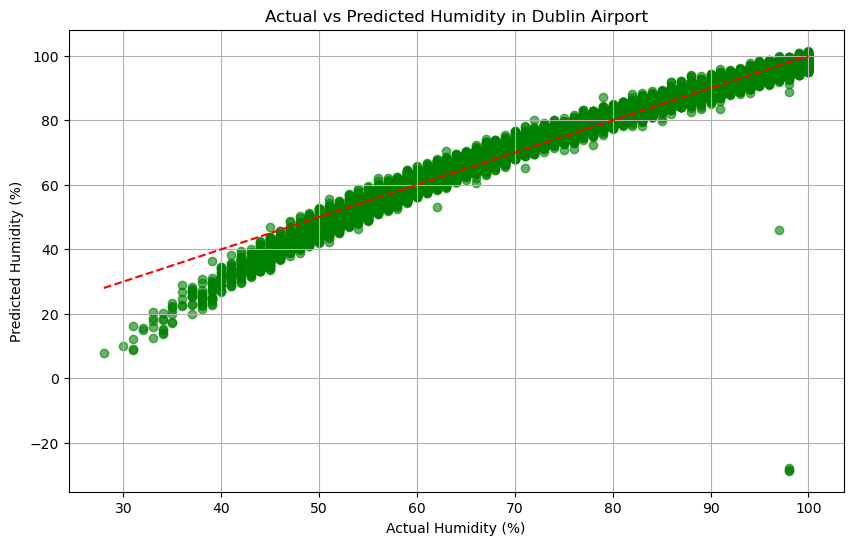

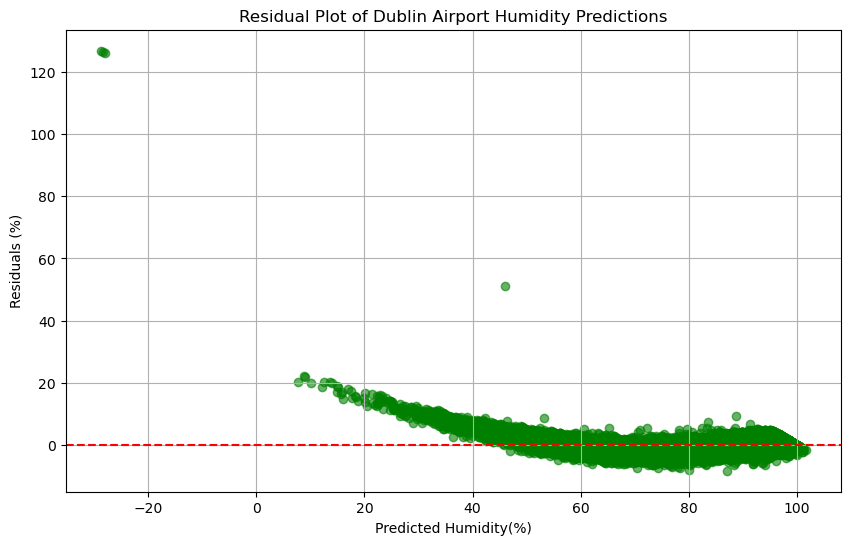

In [ ]:
# Plot Dublin Airport Actual vs Predicted Humidity and Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_d_test, y_d_pred, alpha=0.6, color='green')
plt.plot([y_d_test.min(), y_d_test.max()], [y_d_test.min(), y_d_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Humidity in Dublin Airport')
plt.xlabel('Actual Humidity (%)')
plt.ylabel('Predicted Humidity (%)')
plt.grid()
plt.savefig('Plots/actual_vs_predicted_humidity_dublin.png')
plt.show()

residuals = y_d_test - y_d_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_d_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot of Dublin Airport Humidity Predictions')
plt.xlabel('Predicted Humidity(%)')
plt.ylabel('Residuals (%)')
plt.grid()
plt.savefig('Plots/residuals_humidity_dublin.png')
plt.show()

The plots of Dublin Airport's Actual vs Predicted and Residuals show a tighter fit to both lines with fewer outliers when compared to the plots of Shannon Airport. There is slightly more variability in the Dublin Airport plot however, perhaps due to urban microclimates. Both plots show overpredictions when the climate is drier, however, as the humidity approaches 100%, the model becomes more accurate.

# **4.** Conclusion

From investigating the last 80 years of weather data from Shannon and Dublin Airports, I have gained many insights about the various weather patterns on either coast of the island of Ireland. 

- The mean windspeeds in Dublin are lower than Shannon's.

- Dublin Airport shows more consistent and stable mean windspeeds across the 80 years.

- However, on a month-by-month basis, Shannon displays less changes in windspeed during a given year.

- January is Dublin Airport's windiest month on average, while Febrauary is Shannon's.

- August is the least windy month for both airports.

- Shannon Airport has experienced numerous 'spikes' in windspeed, where windspeed becomes significantly higher than the yearly average.

- Dew point temperature, vapour pressure and air temperature are all highly correlated with one another in both airports.

- The model I built above is approximately 97% accurate in predicting Shannon Airport's relative humidity on a given day, and 98% accurate in predicting Dublin's.

# End